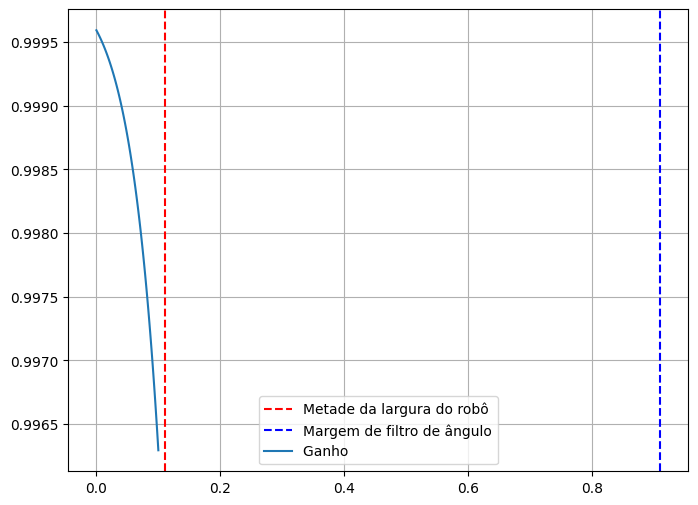

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define the blended_tanh function
def blended_tanh(x):
    # Sigmoid function
    def sigmoid(x, a=2):
        return 1 / (1 + np.exp(-a * x))
    
    # Blending two tanh functions
    blend = sigmoid(x)
    return ((1 - blend) * np.tanh(x * 1) + blend * np.tanh(x * 2) + 1) / 2

# Example values for the parameters
robot_width_ = 0.22  # Width of the robot
angle_filter_margin_ = 0.8  # Margin used for angle filtering

# Plot a vertical line at the robot width

# Generate values for pt_second (only positive values)
pt_second_values = np.linspace(0, 0.1, 100)

# Compute value_gain for each pt_second value
value_gains = []
for pt_second in pt_second_values:
    # Calculate d as defined by the formula
    d = robot_width_ / 2 + angle_filter_margin_ - abs(pt_second)
    
    # Normalize the result using angle_filter_margin_
    product = d / angle_filter_margin_
    
    # Linear mapping
    mapped_product = product * (1.5 + 3) - 3
    
    # Apply the blended_tanh function
    value_gain = blended_tanh(mapped_product)
    
    # Store the value_gain result for each pt_second
    value_gains.append(value_gain)

# Plot the curve of value_gain vs pt_second
plt.figure(figsize=(8, 6))
plt.axvline(x=robot_width_/2, color='r', linestyle='--', label='Metade da largura do robô')
plt.axvline(x=robot_width_/2 + angle_filter_margin_, color='b', linestyle='--', label='Margem de filtro de ângulo')
plt.plot(pt_second_values, value_gains, label='Ganho ')
# plt.title('Value Gain vs pt_second')
# plt.xlabel('pt_second')
# plt.ylabel('Value Gain')
plt.grid(True)
plt.legend()
plt.show()

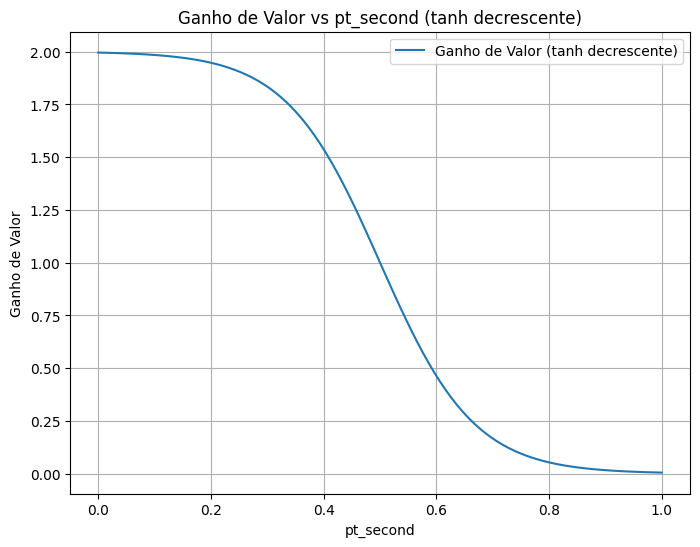

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a função tangente hiperbólica decrescente
def decreasing_tanh(x):
    return 1 - np.tanh(x)

# Gerar valores para pt_second
pt_second_values = np.linspace(0, 1, 100)

# Calcular o ganho de valor usando a tangente hiperbólica decrescente
value_gains = decreasing_tanh(pt_second_values * 6 - 3)

# Plotar a curva
plt.figure(figsize=(8, 6))
plt.plot(pt_second_values, value_gains, label='Ganho de Valor (tanh decrescente)')
plt.title('Ganho de Valor vs pt_second (tanh decrescente)')
plt.xlabel('pt_second')
plt.ylabel('Ganho de Valor')
plt.grid(True)
plt.legend()
plt.show()


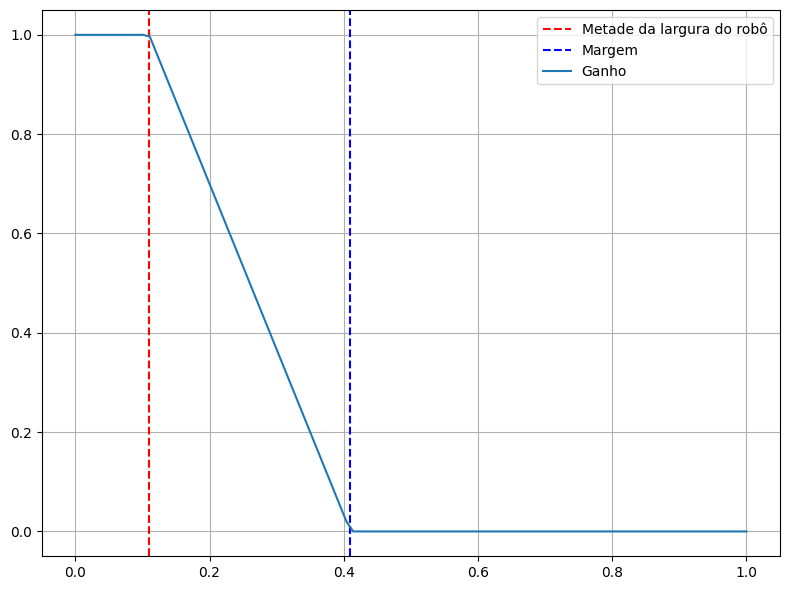

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define the linear function
def linear_gain(x, width, margin):
    if 0 <= x <= width / 2:
        return 1
    elif width / 2 < x <= width / 2 + margin:
        return 1 - (x - width / 2) / margin
    else:
        return 0

# Parameters
robot_width_ = 0.22  # Width of the robot
angle_filter_margin_ = 0.3  # Margin used for angle filtering

# Generate values for pt_second (above 0)
pt_second_values = np.linspace(0, 1, 100)

# Compute value_gain for each pt_second value
value_gains = [linear_gain(pt_second, robot_width_, angle_filter_margin_) for pt_second in pt_second_values]

# Plot the curve of value_gain vs pt_second
plt.figure(figsize=(8, 6))
plt.axvline(x=robot_width_/2, color='r', linestyle='--', label='Metade da largura do robô')
plt.axvline(x=robot_width_/2 + angle_filter_margin_, color='b', linestyle='--', label='Margem')
plt.plot(pt_second_values, value_gains, label='Ganho')
# plt.title('Value Gain (Linear) vs pt_second')
# plt.xlabel('pt_second')
# plt.ylabel('Value Gain')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('value_gain.png', dpi=300)
plt.show()